Necessary libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [10]:
file_paths = ['resources/1948 - 1986.csv', 'resources/1987 - 2022.csv']
data = pd.concat(map(pd.read_csv, file_paths))
df = pd.DataFrame(data)
df

,Title,Episodes,Country,Premiere Year,Final Year,Seasons,Original Channel,Technique
0,001/7 Oyayubi Tom,NaN,Japan,1967,1967,NaN,NaN,NaN
1,3000 Leagues in Search of Mother,52,Japan,1976,1976,NaN,NaN,NaN
2,A kockásfülű nyúl,NaN,Hungary,1977,1979,NaN,NaN,NaN
3,A Rubovian Legend,NaN,UK,1955,1955,NaN,NaN,NaN
4,Ace o Nerae!,26,Japan,1973,1974,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2472,Zorro: Generation Z,26,Britain,2006,2006,NaN,Pop,Traditional
2473,Zorro: The Chronicles,26,France,2016,Present,NaN,France 3,CGI
2474,Zou,36,France,2012,2013,3,"Disney Junior, Disney Channel",CGI
2475,Zouk,TBA,France,2021,2021,TBA,Canal+ Kids,CGI


Exploratory data analysis before cleaning

In [11]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("reports/before_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Sebastián\PycharmProjects\ProyectoFinal_IS2\venv\lib\site-packages\multimethod\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(*args, **kwargs)
C:\Users\Sebastián\PycharmProjects\ProyectoFinal_IS2\venv\lib\site-packages\multimethod\__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Data cleaning

In [12]:
# Drop duplicates
df.drop_duplicates('Title', inplace=True)

# Rows without a defined technique are eliminated
df = df[~df.Technique.isnull()].copy()

# Null values
df['Episodes'] = df['Episodes'].replace(np.nan, 1)
df['Seasons'] = df['Seasons'].replace(np.nan, 1)
df['Original Channel'] = df['Original Channel'].replace(np.nan, 'Unidentified')

# Non-numeric values in numeric rows
df['Seasons'] = pd.to_numeric(df['Seasons'], errors = 'coerce')
df['Episodes'] = pd.to_numeric(df['Episodes'], errors = 'coerce')
df.dropna(inplace = True)

# If the final year is 'Present' it is replaced by 2023
df['Final Year'] = df.loc[df['Final Year'] == 'Present', 'Final Year'] = 2023

# Float to int
df['Episodes'] = np.int_(df['Episodes'])
df['Seasons'] = np.int_(df['Seasons'])
df['Final Year'] = np.int_(df['Final Year'])

df

,Title,Episodes,Country,Premiere Year,Final Year,Seasons,Original Channel,Technique
0,¡Mucha Lucha!,52,United States,2002,2023,3,Kids' WB,Flash
1,10+2,52,Spain,1994,2023,1,"Televisió de Catalunya, KiKa",Traditional
2,100% Wolf: Legend of the Moonstone,26,Australia,2020,2023,2,ABC Me,CGI
3,1001 Nights,52,Canada,2011,2023,2,Teletoon,Flash
4,101 Dalmatian Street,40,"United Kingdom, Canada",2019,2023,1,"Disney Channel, Disney+",Toon Boom Harmony
...,...,...,...,...,...,...,...,...
2471,Zootopia+,6,United States,2022,2023,1,Disney+,CGI
2472,Zorro: Generation Z,26,Britain,2006,2023,1,Pop,Traditional
2473,Zorro: The Chronicles,26,France,2016,2023,1,France 3,CGI
2474,Zou,36,France,2012,2023,3,"Disney Junior, Disney Channel",CGI


Exploratory data analysis after cleaning

In [13]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("reports/after_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Sebastián\PycharmProjects\ProyectoFinal_IS2\venv\lib\site-packages\multimethod\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(*args, **kwargs)
C:\Users\Sebastián\PycharmProjects\ProyectoFinal_IS2\venv\lib\site-packages\multimethod\__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Clustering: K-Means (relationship between the premiere year and the technique used)**

Convert the used technique into a numeric value

In [14]:
le = LabelEncoder()
technique_label = le.fit_transform(df['Technique'])

Define array to process

In [15]:
x = technique_label
y = df['Premiere Year'].values
X = np.array(list(zip(x, y)))

Comparison between the technique and the corresponding value

In [16]:
info = np.array(list(zip(x, df['Technique'])))
info_sorted = info[np.argsort(info[:, 1])]

# Unique rows
unique_rows = np.unique(info_sorted, axis=0)
unique_rows

array([['0', 'Animation'],
       ['1', 'CGI'],
       ['10', 'CGI/Live action'],
       ['100', 'Traditional/CGI'],
       ['101', 'Traditional/Flash'],
       ['102', 'Traditional/Flash/Live-Action'],
       ['103', 'Traditional/Live-Action'],
       ['104', 'Traditional/Live-action'],
       ['105', 'Traditional/Live-action, CGI'],
       ['106', 'Traditional/Toon Boom'],
       ['11', 'CGI/Live-Action'],
       ['12', 'CGI/Live-action'],
       ['13', 'CGI/Stop-Motion'],
       ['14', 'CGI/Traditional'],
       ['15',
        'Cutout animation ("Cartman Gets an Anal Probe"), CGI ("Weight Gain 4000" onwards)'],
       ['16', 'Flash'],
       ['17', 'Flash (2009–2010), Traditional (2010–2013)'],
       ['18',
        'Flash (2011-2022), Traditional (2021), CGI (2022-present)'],
       ['19', 'Flash (2012–19), CGI (2017–present)'],
       ['2', 'CGI / Live-Action'],
       ['20', 'Flash (Season 1-10)/CGI (Season 10)'],
       ['21', 'Flash (first four seasons; Season 5 uses stop-motio

Clusters and labels

In [17]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)

Centroids and colors

In [18]:
centroids = kmeans.cluster_centers_
colors = ["m.", "r.","c.", "y.", "b."]

Label-based coordinate mapping

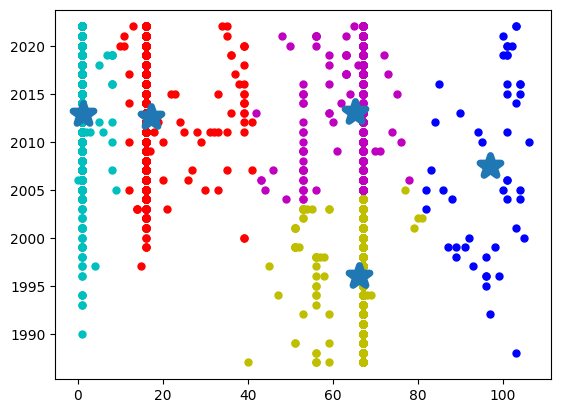

In [19]:
for i in range(len(X)):
    #print("Coordinate: ", X[i], " Label: ", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)

plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=250, linewidths=5, zorder=10)
plt.show()

**Clustering: K-Means (relationship between the country and the technique used)**

In [20]:
le = LabelEncoder()
country_label = le.fit_transform(df['Country'])

In [21]:
x = country_label
y = technique_label
X = np.array(list(zip(x, y)))

Comparison between the country and the corresponding value

In [22]:
info = np.array(list(zip(x, df['Country'])))
info_sorted = info[np.argsort(info[:, 1])]

# Unique rows
unique_rows = np.unique(info_sorted, axis=0)
unique_rows

array([['0', 'Argentina'],
       ['1', 'Australia'],
       ['10', 'Australia, Germany, Spain'],
       ['100', 'France, Brazil'],
       ['101', 'France, Britain'],
       ['102', 'France, Canada, USA'],
       ['103', 'France, China'],
       ['104', 'France, Germany'],
       ['105', 'France, Germany, Italy'],
       ['106', 'France, Germany, United States'],
       ['107', 'France, India'],
       ['108', 'France, India, United States'],
       ['109', 'France, Indonesia, Italy, South Korea, United States'],
       ['11', 'Australia, India, Ireland, Italy, Singapore'],
       ['110', 'France, Ireland'],
       ['111', 'France, Ireland, United States'],
       ['112', 'France, Italy'],
       ['113', 'France, Italy, Japan'],
       ['114', 'France, Italy, United States'],
       ['115', 'France, Japan'],
       ['116', 'France, Japan, Spain, Mexico, Italy'],
       ['117', 'France, South Korea'],
       ['118', 'France, South Korea, Spain'],
       ['119', 'France, South Korea, Uni

Clusters number, labels, centroids and colors

In [23]:
kmeans = KMeans(n_clusters=1)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_
colors = ["m.", "r.","c.", "y.", "b."]

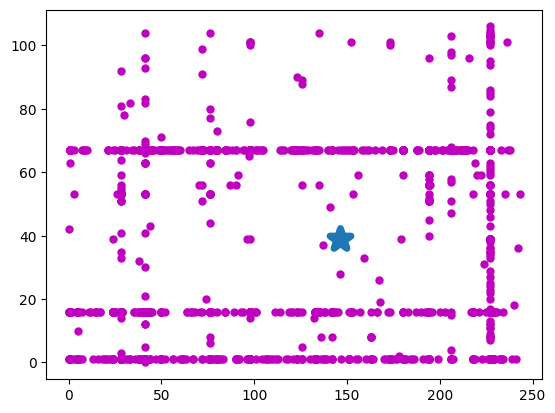

In [24]:
for i in range(len(X)):
    #print("Coordinate: ", X[i], " Label: ", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)

plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=250, linewidths=5, zorder=10)
plt.show()

**Clustering: K-Means (relationship between the number episodes and the technique used)**

In [25]:
le = LabelEncoder()
episodes_label = le.fit_transform(df['Episodes'])

In [26]:
x = episodes_label
y = technique_label
X = np.array(list(zip(x, y)))

Comparison between number episodes and the corresponding value

In [27]:
info = np.array(list(zip(x, df['Episodes'])))
info_sorted = info[np.argsort(info[:, 1])]

# Unique rows
unique_rows = np.unique(info_sorted, axis=0)
unique_rows

array([[   0,    1],
       [   1,    2],
       [   2,    3],
       [   3,    4],
       [   4,    5],
       [   5,    6],
       [   6,    7],
       [   7,    8],
       [   8,    9],
       [   9,   10],
       [  10,   11],
       [  11,   12],
       [  12,   13],
       [  13,   14],
       [  14,   15],
       [  15,   16],
       [  16,   17],
       [  17,   18],
       [  18,   19],
       [  19,   20],
       [  20,   21],
       [  21,   22],
       [  22,   23],
       [  23,   24],
       [  24,   25],
       [  25,   26],
       [  26,   27],
       [  27,   28],
       [  28,   29],
       [  29,   30],
       [  30,   31],
       [  31,   32],
       [  32,   33],
       [  33,   34],
       [  34,   35],
       [  35,   36],
       [  36,   37],
       [  37,   38],
       [  38,   39],
       [  39,   40],
       [  40,   41],
       [  41,   42],
       [  42,   43],
       [  43,   44],
       [  44,   45],
       [  45,   46],
       [  46,   47],
       [  47,

Clusters number, labels, centroids and colors

In [28]:
kmeans = KMeans(n_clusters=1)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_
colors = ["m.", "r.","c.", "y.", "b."]

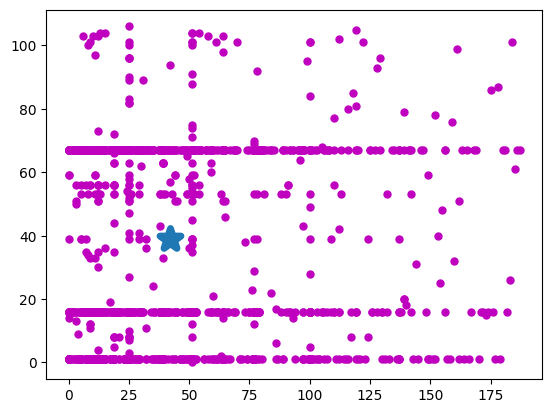

In [29]:
for i in range(len(X)):
    #print("Coordinate: ", X[i], " Label: ", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)

plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=250, linewidths=5, zorder=10)
plt.show()